# Lista 1
## Visão Computacional

Alunos: Hugo Gabriel de Melo Santos
        Larissa Duarte Santana

1. Implemente uma funcao que receba uma imagem em formato PPM,
o tamanho n de um filtro espacial com dimens ̃oes n × n e a matriz com os
pesos do filtro, e aplique o filtro com uma convolu ̧c ̃ao, gerando e salvando a
imagem resultante no disco em formato PPM. Vocˆe n ̃ao pode usar a OpenCV

em nenhum desses passos. As especifica ̧c ̃oes do formato PPM podem ser en-
contradas aqui: https://netpbm.sourceforge.net/doc/ppm.html

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image




In [63]:
def aplicar_filtro_ppm(imagem_ppm, tamanho_filtro, pesos_filtro, output_filename='default.ppm'):
    # Abrir imagem PPM
    with open(imagem_ppm, 'rb') as imagem:
        # Ler cabeçalho da imagem PPM
        cabecalho = imagem.readline()
        # Ler dimensões da imagem PPM
        dimensoes = imagem.readline().decode().split()
        largura = int(dimensoes[0])
        altura = int(dimensoes[1])
        # Ler valor máximo da cor
        valor_maximo = int(imagem.readline())

        # Ler dados da imagem PPM
        imagem_data = np.fromfile(imagem, dtype=np.uint8).reshape((altura, largura, 3))

    # Converter pesos do filtro em um array numpy
    pesos_filtro = np.array(pesos_filtro)

    # Calcular tamanho do padding
    padding = tamanho_filtro // 2

    # Adicionar padding na imagem
    imagem_data_padded = np.pad(imagem_data, ((padding, padding), (padding, padding), (0, 0)), mode='edge')

    # Criar imagem resultante
    imagem_resultante = np.zeros_like(imagem_data)

    # Aplicar filtro
    for i in range(padding, altura + padding):
        for j in range(padding, largura + padding):
            # Selecionar região da imagem correspondente ao tamanho do filtro
            regiao = imagem_data_padded[i - padding:i + padding + 1, j - padding:j + padding + 1, :]

            # Realizar a convolução
            pixel_resultante = np.sum(regiao * pesos_filtro, axis=(0, 1))

            # Armazenar pixel resultante na imagem resultante
            imagem_resultante[i - padding, j - padding, :] = pixel_resultante

    # Salvar imagem resultante em formato PPM
    with open(output_filename, 'wb') as imagem_resultante_ppm:
        # Escrever cabeçalho da imagem PPM
        imagem_resultante_ppm.write(cabecalho)
        imagem_resultante_ppm.write('{} {}\n'.format(largura, altura).encode())
        imagem_resultante_ppm.write('{}\n'.format(valor_maximo).encode())

        # Escrever dados da imagem PPM
        imagem_resultante.tofile(imagem_resultante_ppm)
        

In [64]:
image_path = 'nayeon.ppm'
filter_size = 3
filter_weights = [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]

aplicar_filtro_ppm(image_path, filter_size, filter_weights)

2. Usando a fun ̧c ̃ao da quest ̃ao 1, implemente dois tipos de filtro para
remo ̧c ̃ao de ru ́ıdos e aplique-os em trˆes imagens distintas.

In [81]:
def filtro_media(tamanho_filtro):
    # Criar matriz de pesos com valores iguais a 1
    pesos_filtro = np.ones((tamanho_filtro, tamanho_filtro, 3)) / (tamanho_filtro ** 2)
    return pesos_filtro

def filtro_mediana(tamanho):
    # Criar matriz de pesos com valor 1 para todos os elementos
    matriz_pesos = np.ones((tamanho, tamanho))
    # Transformar matriz em uma lista unidimensional e ordenar em ordem crescente
    lista_pesos = sorted(matriz_pesos.flatten())
    # Selecionar o elemento mediano da lista de pesos
    peso_mediana = lista_pesos[len(lista_pesos) // 2]
    # Preencher a matriz de pesos com o valor mediano
    matriz_pesos.fill(peso_mediana)
    # Retornar a matriz de pesos
    return matriz_pesos

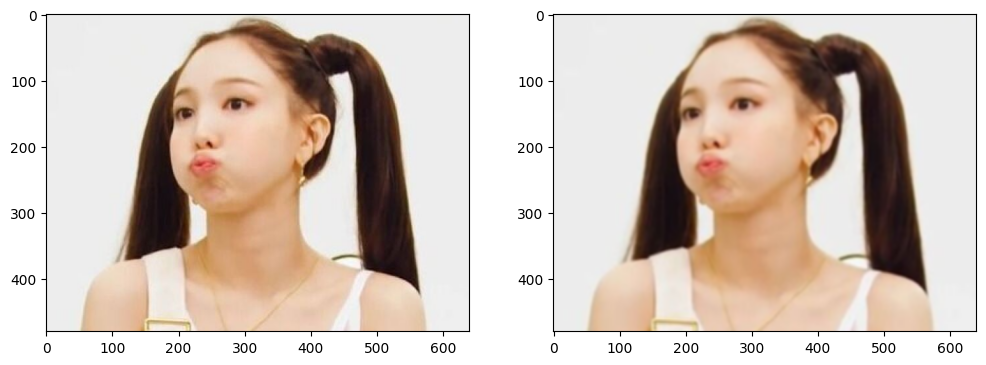

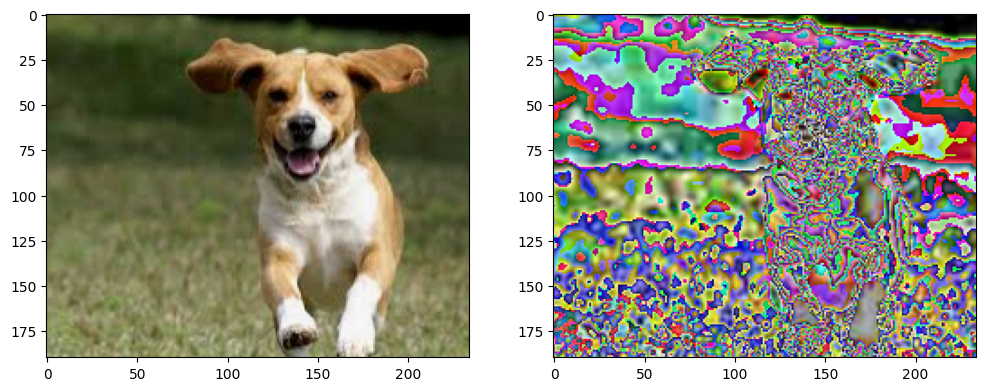

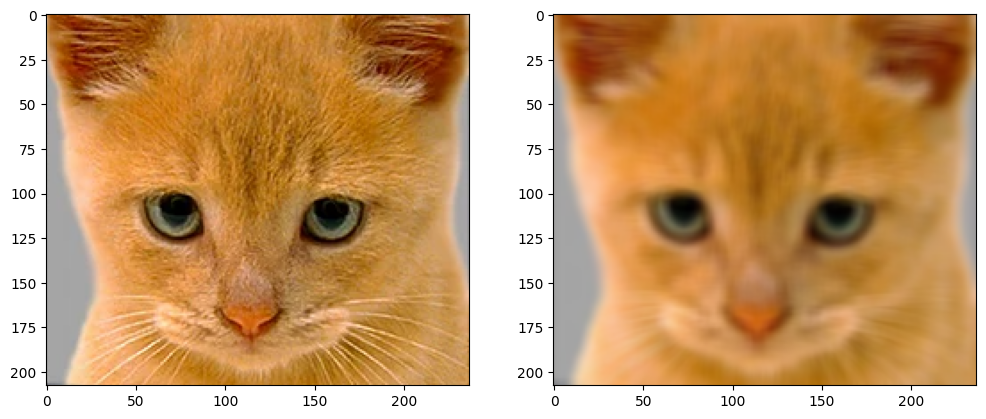

In [80]:
# Aplicar filtro de média em uma imagem
imagem_ppm1 = 'nayeon.ppm'
tamanho_filtro = 5
pesos_filtro = filtro_media(tamanho_filtro)
aplicar_filtro_ppm(imagem_ppm1, tamanho_filtro, pesos_filtro, output_filename='nayeon_out.ppm')

# Aplicar filtro de mediana em uma imagem
imagem_ppm2 = 'dog.ppm'
tamanho_filtro = 3
filtro_mediana_pixel = filtro_mediana(tamanho_filtro)
aplicar_filtro_ppm(imagem_ppm2, tamanho_filtro, filtro_mediana_pixel, output_filename='dog_out.ppm')

# Aplicar filtro de média em outra imagem
imagem_ppm3 = 'cat.ppm'
tamanho_filtro = 7
pesos_filtro = filtro_media(tamanho_filtro)
aplicar_filtro_ppm(imagem_ppm3, tamanho_filtro, pesos_filtro, output_filename='cat_out.ppm')

plt.figure(figsize=(12,6))
img1 = plt.imread('nayeon_out.ppm')
img2 = plt.imread('dog_out.ppm')
img3 = plt.imread('cat_out.ppm')

img_orig1 = plt.imread(imagem_ppm1)
img_orig2 = plt.imread(imagem_ppm2)
img_orig3 = plt.imread(imagem_ppm3)
plt.subplot(1, 2, 1)
plt.imshow(img_orig1)
# Exibir imagem
plt.subplot(1, 2, 2)
plt.imshow(img1)

plt.show()
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_orig2)
plt.subplot(1,2,2)

plt.imshow(img2)
plt.show()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_orig3)
plt.subplot(1,2,2)
plt.imshow(img3)
plt.show()
# Ler imagem PPM

# Exibir imagem



3. Usando a fun ̧c ̃ao da quest ̃ao 1, pesquise um filtro passa-alta e
aplique-o em 3 imagens distintas, variando o valor de n em 3 unidades em
cada imagem. O que acontece quando n cresce?

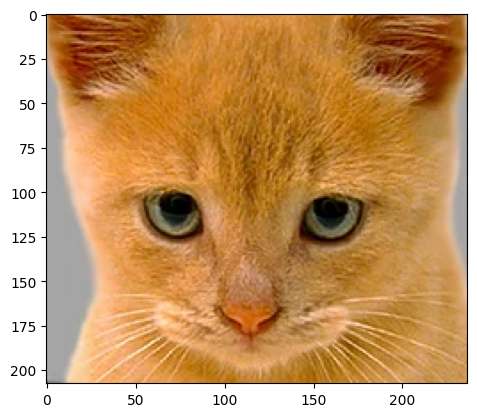

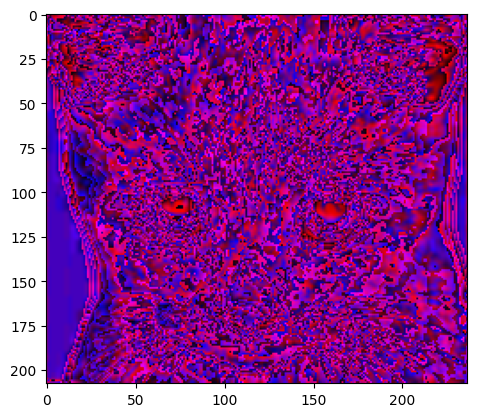

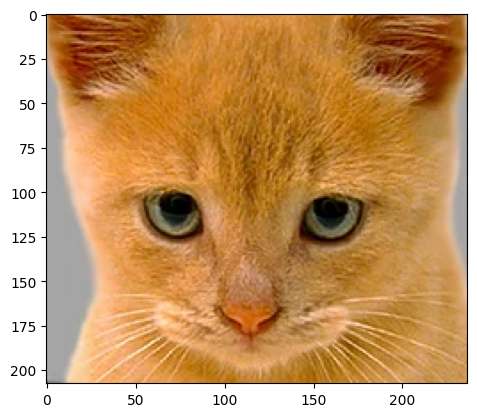

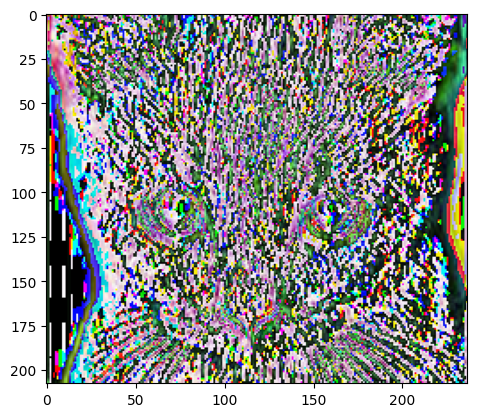

In [6]:
sobel_horizontal = np.array([    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_vertical = np.array([    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

imagem = 'cat.ppm'
tamanho_filtro = 3
pesos_filtro = sobel_horizontal
aplicar_filtro_ppm(imagem, tamanho_filtro, pesos_filtro, 'imagem_sobel_horizontal.ppm')

imagem = 'cat.ppm'
tamanho_filtro = 3
pesos_filtro = sobel_vertical

aplicar_filtro_ppm(imagem, tamanho_filtro, pesos_filtro, 'imagem_sobel_vertical.ppm')

5. Aplique o detector de canny usando a fun ̧c ̃ao Canny() da OpenCV
em uma ou mais imagens de sua escolha. Experimente variar os parˆametros
threshold1, threshold2 e apertureSize. Explique com suas palavras a influˆencia
de cada parˆametro no resultado.

In [7]:
!pip install opencv-python

You should consider upgrading via the 'c:\users\hugom\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [8]:
import cv2

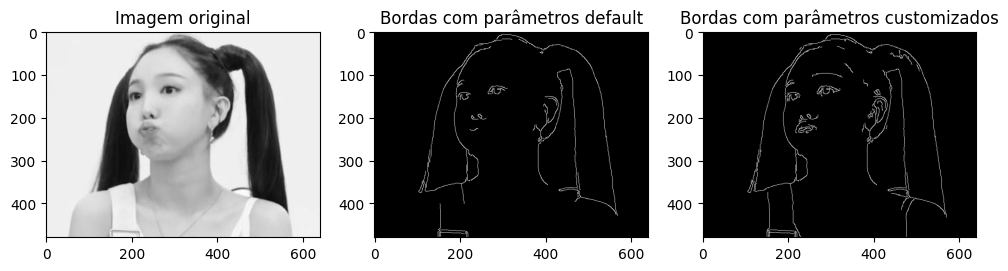

In [70]:
# Carregar imagem em escala de cinza
img = cv2.imread('nayeon.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar Canny com parâmetros default
edges1 = cv2.Canny(img, 100, 200)

# Aplicar Canny com parâmetros customizados
edges2 = cv2.Canny(img, 50, 150, apertureSize=3)

# Plotar imagens
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagem original')

plt.subplot(1, 3, 2)
plt.imshow(edges1, cmap='gray')
plt.title('Bordas com parâmetros default')

plt.subplot(1, 3, 3)
plt.imshow(edges2, cmap='gray')
plt.title('Bordas com parâmetros customizados')


plt.show()

Os parâmetros threshold1 e threshold2 são usados para controlar a sensibilidade do algoritmo na detecção de bordas. Eles definem os limiares mínimo e máximo para os gradientes das bordas. Valores mais altos para esses parâmetros resultam em menos bordas detectadas, enquanto valores mais baixos resultam em mais bordas detectadas.

O parâmetro apertureSize é o tamanho do filtro de Sobel usado na detecção de bordas. 
O filtro Sobel é usado para calcular a magnitude do gradiente na imagem, que é usada para detectar bordas. 
Um filtro maior pode capturar melhor as características de bordas maiores, mas pode perder detalhes das bordas menores. 





6. Implemente uma fun ̧c ̃ao que aumente a resolu ̧c ̃ao da imagem por
um fator s, onde s  ́e um inteiro maior que 1, usando a abordagem de vizinho

mais pr ́oximo. Vocˆe s ́o pode usar o OpenCV para carregar a imagem. Apli-
que sua fun ̧c ̃ao em uma imagem, com 3 valores de s distintos.

In [10]:
def aumentar_resolucao(img, s):
    altura, largura = img.shape[:2]
    nova_altura, nova_largura = s * altura, s * largura
    nova_img = np.zeros((nova_altura, nova_largura, 3), dtype=np.uint8)
    for i in range(nova_altura):
        for j in range(nova_largura):
            i_original = i // s
            j_original = j // s
            nova_img[i, j, :] = img[i_original, j_original, :]
    return nova_img

In [11]:
# Carregar imagem usando o OpenCV
img = cv2.imread('nayeon.jpg')

# Aumentar a resolução da imagem por um fator de 2, 3 e 4
nova_img1 = aumentar_resolucao(img, 2)
nova_img2 = aumentar_resolucao(img, 3)
nova_img3 = aumentar_resolucao(img, 4)

# Mostrar imagens resultantes

# Plotar imagens
# plt.figure(figsize=(12,6))
# plt.subplot(1, 4, 1)
# plt.imshow(img, cmap='gray')
# plt.title('Imagem original')

# plt.subplot(1, 4, 2)
# plt.imshow(nova_img1, cmap='gray')
# plt.title('Nova imagem (fator 2)')

# plt.subplot(1, 4, 3)
# plt.imshow(nova_img2, cmap='gray')
# plt.title('Nova imagem (fator 3)')

# plt.subplot(1, 4, 4)
# plt.imshow(nova_img3, cmap='gray')
# plt.title('Nova imagem (fator 4)')

# plt.show()

# Mostrar imagens resultantes
cv2.imshow('Imagem original', img)
cv2.imshow('Nova imagem (fator 2)', nova_img1)
cv2.imshow('Nova imagem (fator 3)', nova_img2)
cv2.imshow('Nova imagem (fator 4)', nova_img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

7. Escolha uma imagem interessante e gere uma pirˆamide aplicando
sucessivamente downsampling 3 vezes com fator 1/2. Fa ̧ca o mesmo com
uma pirˆamide gaussiana e compare os resultados. Mostre os resultados de
cada pirˆamide em uma  ́unica imagem lado a lado, como no slides 20 (vai
exigir algumas opera ̧c ̃oes de transla ̧c ̃ao de imagens). Obs.: aqui vocˆe pode
usar fun ̧c ̃oes do OpenCV.

In [24]:
def reshapeImage(image,factor):
    h = image.shape[0]
    w = image.shape[1]
    
    h *= factor
    w *= factor
    
    result = cv2.resize(image,(int(w),int(h)))
    return result



In [25]:
from PIL import Image

In [26]:
# gerando as versões reduzidas
car = cv2.imread('./car.png')
car = cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)/255

car2 = reshapeImage(car,1/2)
car3 = reshapeImage(car2,1/2)
car4 = reshapeImage(car3,1/2)

# gerando a pirâmide gaussiana

g_car2 = cv2.GaussianBlur(car,(3,3),3)
g_car2 = reshapeImage(g_car2,1/2)

g_car3 = cv2.GaussianBlur(g_car2,(3,3),3)
g_car3 = reshapeImage(g_car3,1/2)

g_car4 = cv2.GaussianBlur(g_car3,(3,3),3)
g_car4 = reshapeImage(g_car4,1/2)

plt.imsave('./car1.png',car,cmap='gray')
plt.imsave('./car2.png',car2,cmap='gray')
plt.imsave('./car3.png',car3,cmap='gray')
plt.imsave('./car4.png',car4,cmap='gray')
plt.imsave('./g_car2.png',g_car2,cmap='gray')
plt.imsave('./g_car3.png',g_car3,cmap='gray')
plt.imsave('./g_car4.png',g_car4,cmap='gray')

In [27]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [28]:
def get_concat_h_blank(im1, im2, color=(0, 0, 0)):
    dst = Image.new('RGB', (im1.width + im2.width, max(im1.height, im2.height)), color)
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [29]:
def get_concat_h_multi_blank(im_list):
    _im = im_list.pop(0)
    for im in im_list:
        _im = get_concat_h_blank(_im, im)
    return _im

In [30]:
car1 = Image.open('./car1.png')
car2 = Image.open('./car2.png')
car3 = Image.open('./car3.png')
car4 = Image.open('./car4.png')
g_car2 = Image.open('./g_car2.png')
g_car3 = Image.open('./g_car3.png')
g_car4 = Image.open('./g_car4.png')

In [31]:
concat = get_concat_h_multi_blank([car1,car2,car3,car4])

### Resultado sem a pirâmide Gausiana

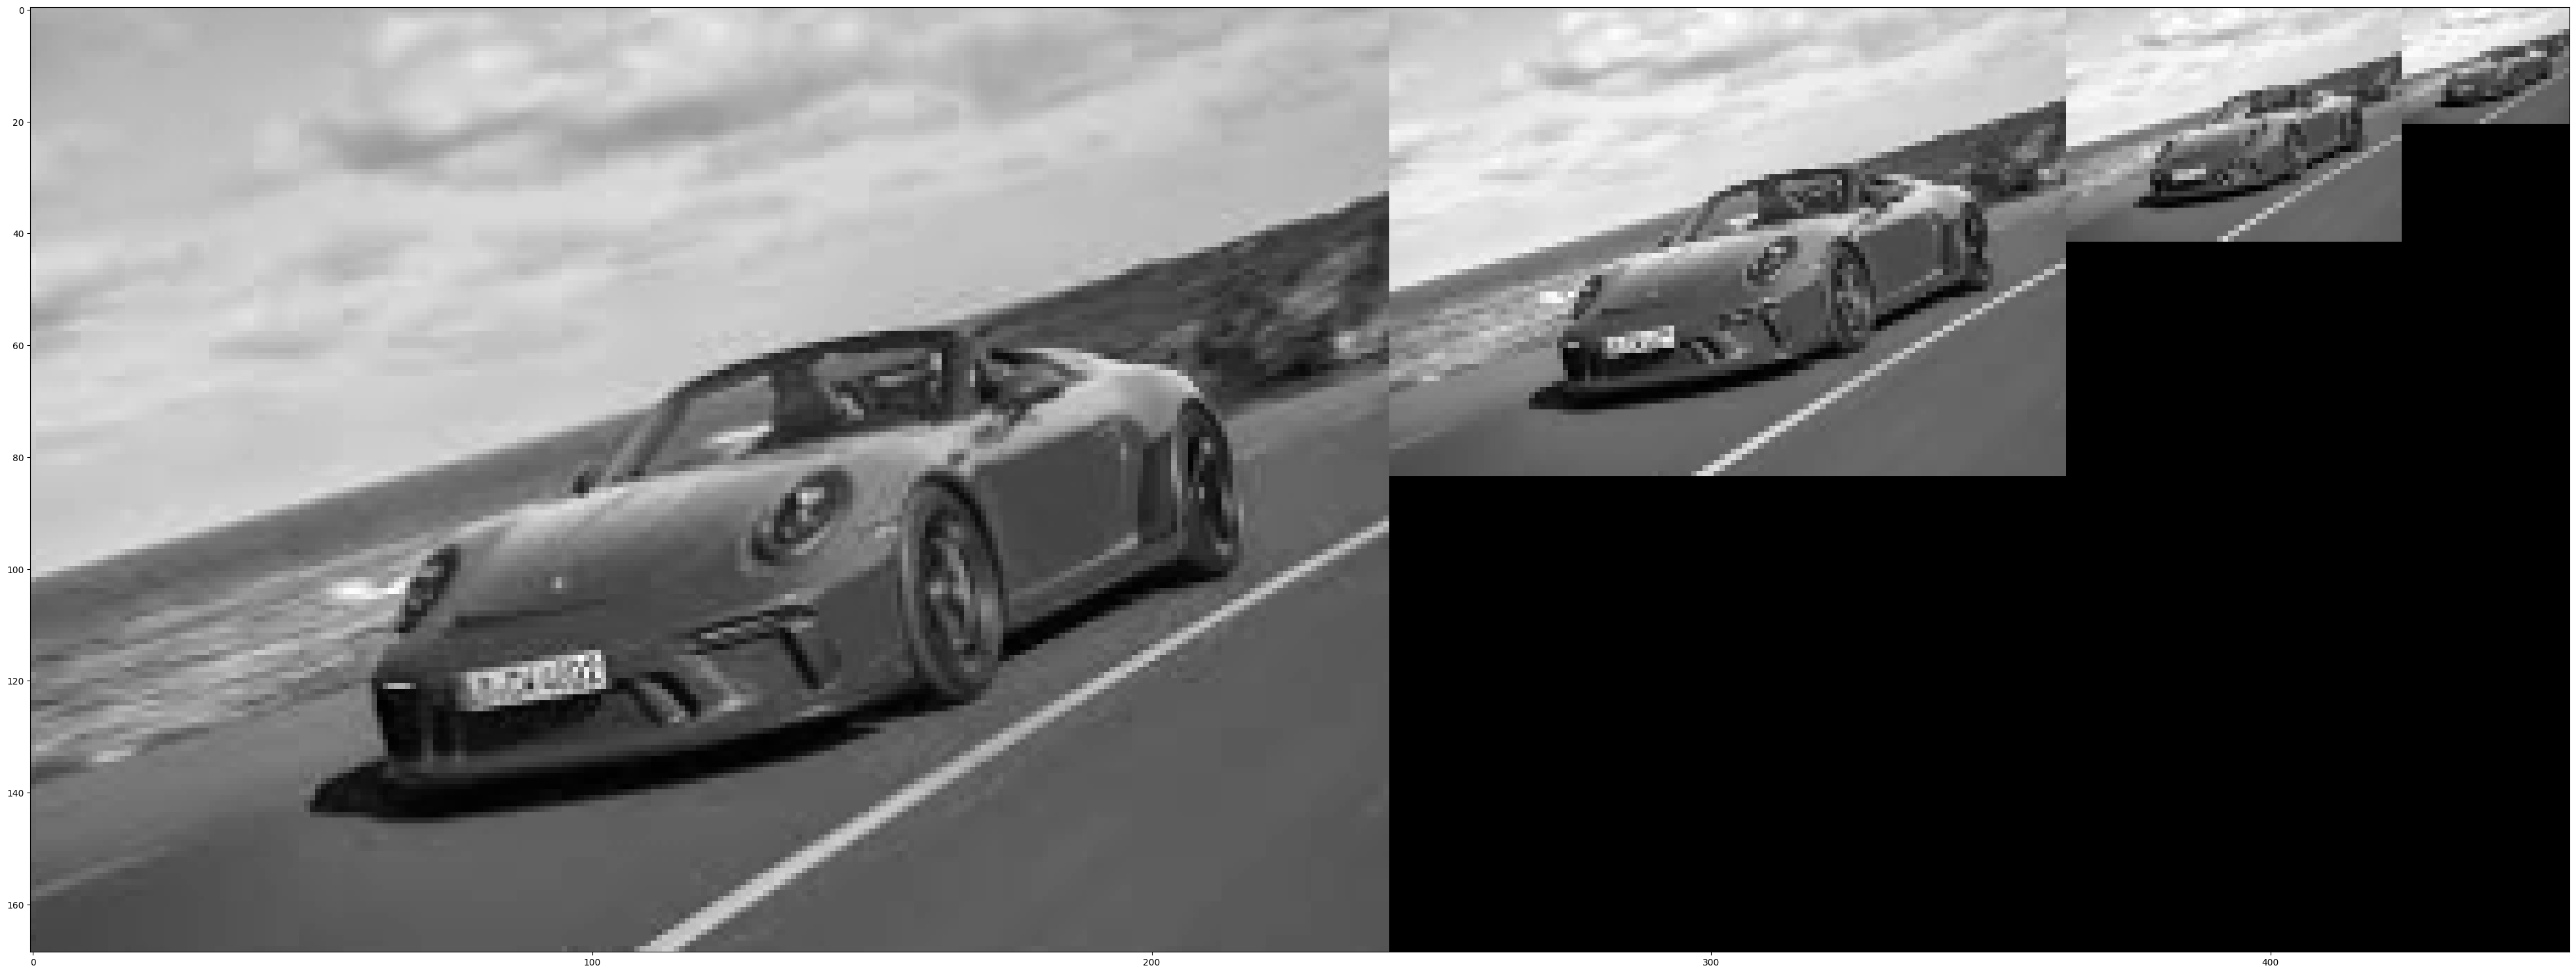

In [32]:
plt.figure(figsize=(50,50))
plt.imshow(concat,cmap='gray')

### Resultado com pirâmide Gausianna

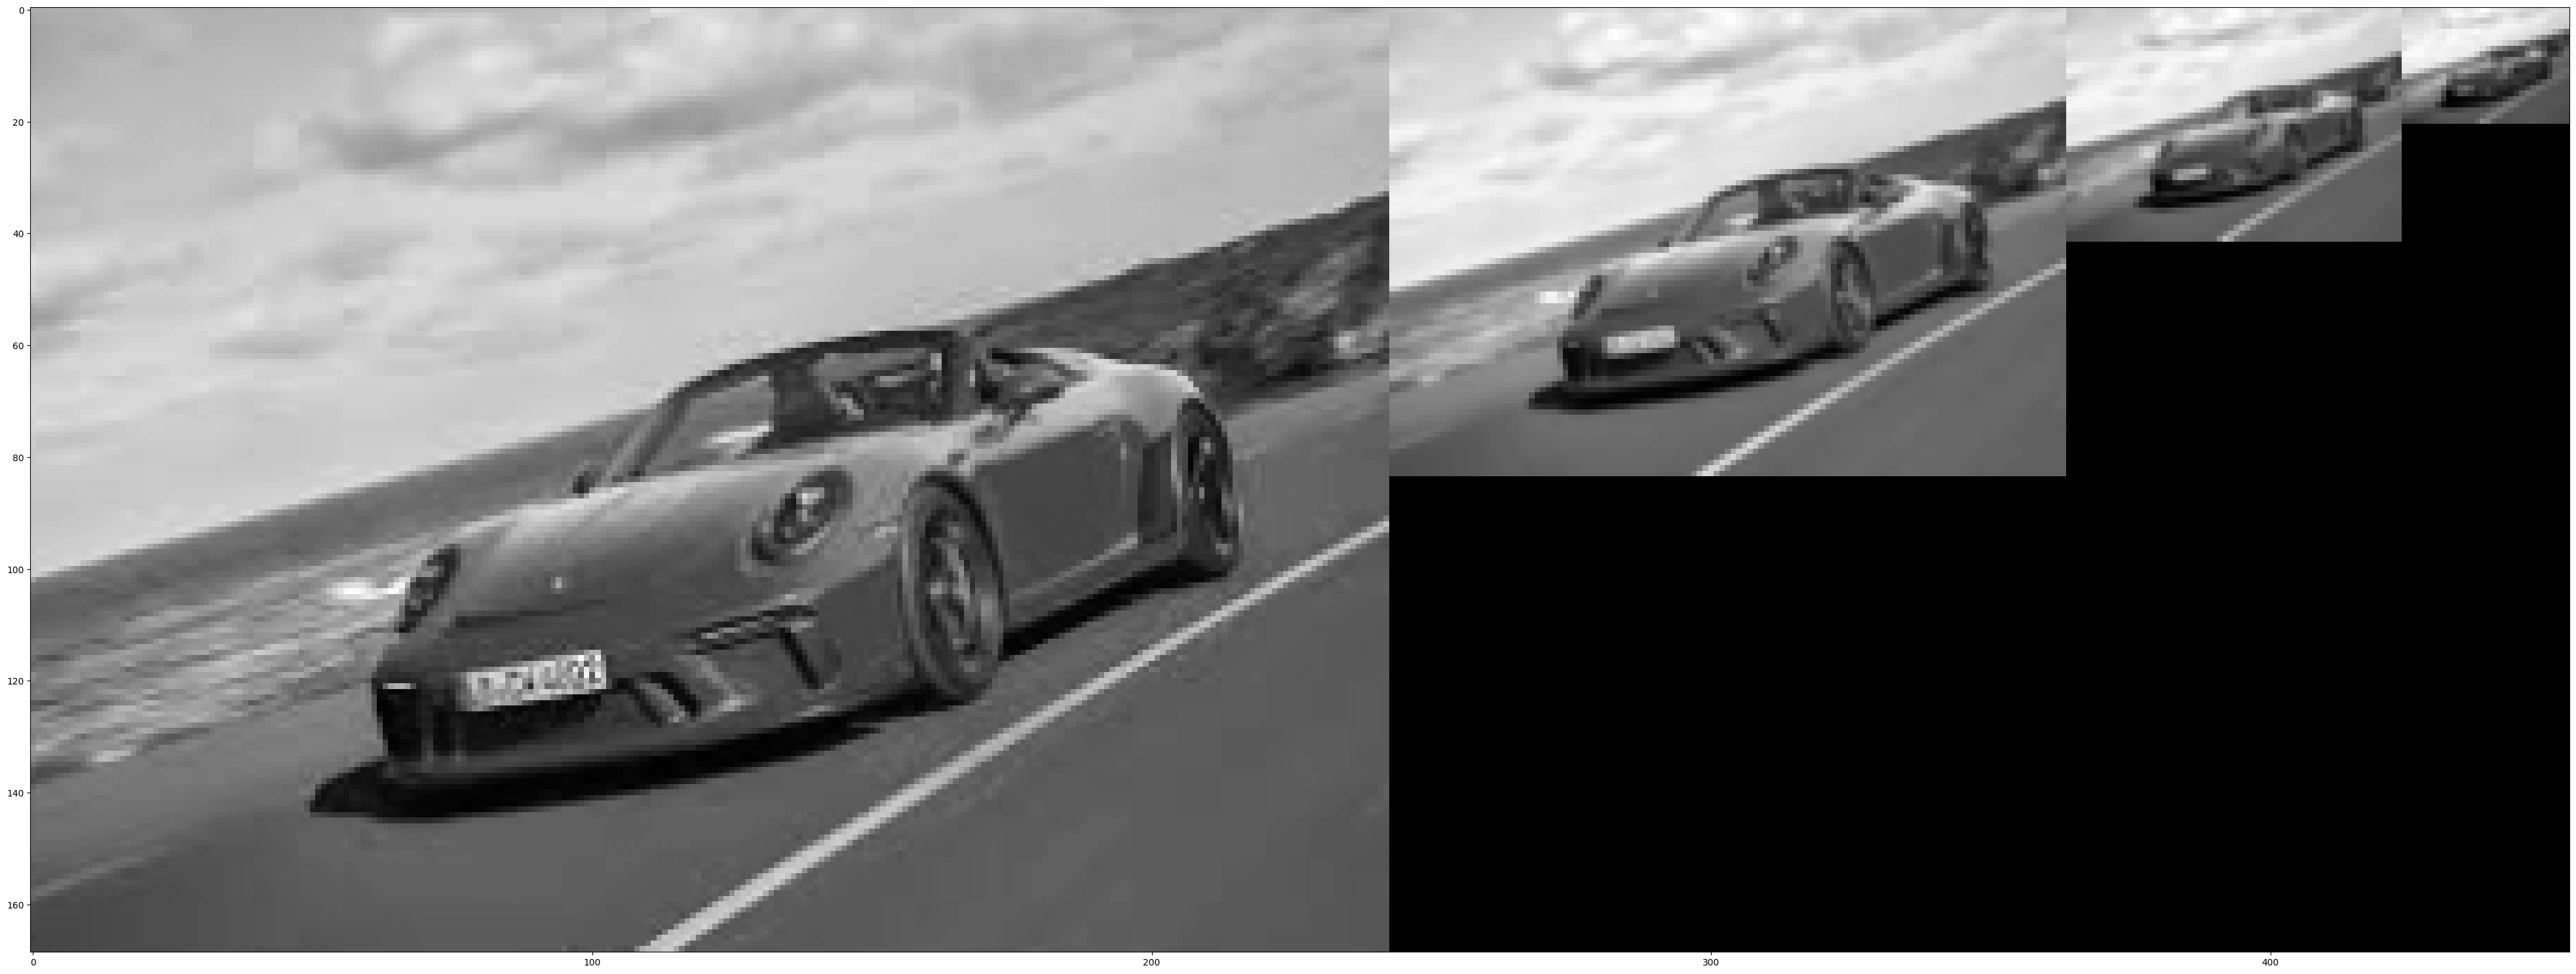

In [33]:
concat2 = get_concat_h_multi_blank([car1,g_car2,g_car3,g_car4])

plt.figure(figsize=(50,50))
plt.imshow(concat2,cmap='gray')